### Day 17: Spinlock

Suddenly, whirling in the distance, you notice what looks like a massive, pixelated hurricane: a deadly [spinlock](https://en.wikipedia.org/wiki/Spinlock). This spinlock isn't just consuming computing power, but memory, too; vast, digital mountains are being ripped from the ground and consumed by the vortex.

If you don't move quickly, fixing that printer will be the least of your problems.

In [1]:
 # Usual imports
    
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

### Part One

This spinlock's algorithm is simple but efficient, quickly consuming everything in its path. It starts with a circular buffer containing only the value 0, which it marks as the **current position**. It then steps forward through the circular buffer some number of steps (your puzzle input) before inserting the first new value, 1, after the value it stopped on. The inserted value becomes the **current position**. Then, it steps forward from there the same number of steps, and wherever it stops, inserts after it the second new value, 2, and uses that as the new current position again.

It repeats this process of **stepping forward, inserting a new value**, and using the location of the inserted value as the new current position a total of **2017 times**, inserting 2017 as its final operation, and ending with a total of 2018 values (including 0) in the circular buffer.

For example, if the spinlock were to step 3 times per insert, the circular buffer would begin to evolve like this (using parentheses to mark the current position after each iteration of the algorithm):

 - `(0)`, the initial state before any insertions.
 
 - `0 (1)`: the spinlock steps forward three times (0, 0, 0), and then inserts the first value, 1, after it. 1 becomes the current position.
 
 - `0 (2) 1`: the spinlock steps forward three times (0, 1, 0), and then inserts the second value, 2, after it. 2 becomes the current position.
 
 - `0  2 (3) 1`: the spinlock steps forward three times (1, 0, 2), and then inserts the third value, 3, after it. 3 becomes the current position.

And so on:

    0  2 (4) 3  1
    0 (5) 2  4  3  1
    0  5  2  4  3 (6) 1
    0  5 (7) 2  4  3  6  1
    0  5  7  2  4  3 (8) 6  1
    0 (9) 5  7  2  4  3  8  6  1

In [2]:
buffer = deque([0])
cur_pos = 0

def round(steps=3):
    global buffer, cur_pos
    last_value = buffer[cur_pos]
    cur_pos = ((cur_pos + steps) % len(buffer)) + 1
    buffer.insert(cur_pos, last_value+1)
    
def print_buffer():
    global buffer, cur_ops
    if len(buffer) < 20:
        for (i, v) in enumerate(buffer):
            if i == cur_pos:
                s = '({})'.format(v)
                print('{:^3}'.format(s), end='')
            else:
                print('{:^3}'.format(v),end='')
    else:
        for i in range(10):
            v = buffer[i]
            if i == cur_pos:
                s = '({})'.format(v)
                print('{:^3}'.format(s), end='')
            else:
                print('{:^3}'.format(v),end='')
        print('...', end=' ')
        for i in range(-10, 1):
            v = buffer[i]
            if len(buffer) + i == cur_pos:
                s = '({})'.format(v)
                print('{:^3}'.format(s), end='')
            else:
                print('{:^3}'.format(v),end='')
    print()
    
for i in range(9):
    print_buffer()
    round(3)
print_buffer()

(0)
 0 (1)
 0 (2) 1 
 0  2 (3) 1 
 0  2 (4) 3  1 
 0 (5) 2  4  3  1 
 0  5  2  4  3 (6) 1 
 0  5 (7) 2  4  3  6  1 
 0  5  7  2  4  3 (8) 6  1 
 0 (9) 5  7  2  4  3  8  6  1 


Eventually, after 2017 insertions, the section of the circular buffer near the last insertion looks like this:

1512  1134  151 (2017) 638  1513  851

In [3]:
buffer = deque([0])
cur_pos = 0
for _ in range(2017):
    round(3)
pos = buffer.index(2017)
for i in range(pos-3, pos+4):
    if i == pos:
        print('({})'.format(buffer[i]), end=' ')
    else:
        print(buffer[i], end=' ')

1512 1134 151 (2017) 638 1513 851 

Perhaps, if you can identify the value that will ultimately be after the last value written (2017), you can short-circuit the spinlock. In this example, that would be 638.

**What is the value after 2017 in your completed circular buffer?**

Your puzzle input is **377**.

In [4]:
buffer = deque([0])
cur_pos = 0
for _ in range(2017):
    round(377)
pos = buffer.index(2017)
for i in range(pos-3, pos+4):
    if i == pos:
        print('({})'.format(buffer[i]), end=' ')
    else:
        print(buffer[i], end=' ')

477 1120 1320 (2017) 596 1065 363 

In [5]:
print('Part one:', buffer[pos+1])

Part one: 596


### Part Two

The spinlock does not short-circuit. Instead, it gets more angry. At least, you assume that's what happened; it's spinning significantly faster than it was a moment ago.

You have good news and bad news.

The good news is that you have improved calculations for how to stop the spinlock. They indicate that you actually need to identify the value after 0 in the current state of the circular buffer.

The bad news is that while you were determining this, the spinlock has just finished inserting its fifty millionth value (50000000).

What is the value after 0 the moment 50000000 is inserted?


let's see the data:

In [6]:
buffer = deque([0])
cur_pos = 0
print_buffer()
for i in range(19):
    round(377)
    print_buffer()

(0)
 0 (1)
 0 (2) 1 
 0 (3) 2  1 
 0  3  2 (4) 1 
 0 (5) 3  2  4  1 
 0 (6) 5  3  2  4  1 
 0 (7) 6  5  3  2  4  1 
 0  7  6 (8) 5  3  2  4  1 
 0  7  6 (9) 8  5  3  2  4  1 
 0 (10) 7  6  9  8  5  3  2  4  1 
 0 10  7  6  9 (11) 8  5  3  2  4  1 
 0 10  7  6  9 11  8  5  3  2  4 (12) 1 
 0 10  7  6  9 11  8  5  3  2  4 12 (13) 1 
 0 10  7  6  9 11  8  5  3  2  4 12 (14)13  1 
 0 10  7  6  9 11  8  5  3  2  4 12 14 13  1 (15)
 0 10  7  6  9 11  8  5  3 (16) 2  4 12 14 13  1 15 
 0 10  7  6  9 11  8  5  3 16  2  4 12 (17)14 13  1 15 
 0 10  7  6  9 11  8  5  3 16  2  4 12 (18)17 14 13  1 15 
 0 10  7  6  9 11  8  5  3 16 ...  2 (19) 4 12 18 17 14 13  1 15  0 


If we are interested only in the second value (index 1), we can forget about the buffer. We can just remenber the value at the second position when `cur_pos` is $1$ again:

In [7]:
def round2(buff_size, cur_pos, steps=3):
    next_value = buff_size+1
    cur_pos = ((cur_pos + steps) % buff_size) + 1
    return cur_pos
  
index = cur_pos = 0
for index in range(19):
    cur_pos = round2(index+1, cur_pos, steps=377)
    print(cur_pos, index+1, '✓' if cur_pos == 1 else '')


1 1 ✓
1 2 ✓
1 3 ✓
3 4 
1 5 ✓
1 6 ✓
1 7 ✓
3 8 
3 9 
1 10 ✓
5 11 
11 12 
12 13 
12 14 
15 15 
9 16 
13 17 
13 18 
11 19 


Let's try it:

In [8]:
index = cur_pos = 0
value = 0
for index in range(50000000):
    cur_pos = round2(index+1, cur_pos, steps=377)
    if cur_pos == 1:
        print(index, value+1)
        value = index+1
print('Part two:', value)

0 1
1 2
2 3
4 4
5 6
6 7
9 8
81 11
475 83
2422 477
2817 2424
3711 2819
4181 3713
35656 4183
583276 35658
626522 583278
1760404 626524
4842664 1760406
9440559 4842666
10357703 9440561
22036450 10357705
39051594 22036452
Part two: 39051595


### Extra

List versus deque ¿What is better if we are working with a lot of values and just want to append/pop/insert at 0)?

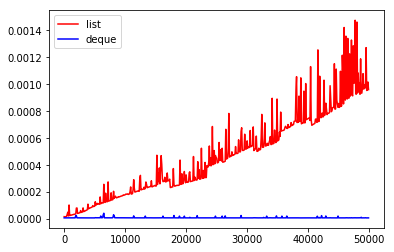

In [9]:
from collections import deque
import timeit

sizes = list(range(1, 50001, 100))
y1 = []
y2 = []
for size in sizes:
    
    y1.append(timeit.timeit(
        '_ = l.pop(0); l.append(_)',
        setup='l = list(range(size))',
        number=100, 
        globals={
            'size':size
            }
        ))
    y2.append(timeit.timeit(
        '_ = q.popleft(); q.append(_)',
        setup='q = deque(range(size))',
        number=100,
        globals={
            'size':size,
            'deque': deque,
            }
        ))

plt.plot(sizes, y1, 'r')
plt.plot(sizes, y2, 'b')
plt.legend(['list', 'deque']);